# Test countries analysis: Contiguous USA

These notebooks apply the harmonizer model to each of the shapefiles provided in the `roifiles/` sub-directory:
- Contiguous US ("CONUS") **featured in this notebook**
- Germany
- Spain
- France
- Italy
- Japan
- Mauritius
- Nicaragua
- Puerto Rico
- El Salvador
- Uganda

As a prerequisite to executing this analyis the harmonizer must be run to get the outputs. This can be done for all countries in the test folder at once. To run, simply to go command line (at root level of this repo) and enter:

`$ python -m harmonizer.main -a`

It will take ~40 min (2-3 minutes for each country, except the US which takes 20+).

Results for all will be in the `outputs/<country_shapefile_name>` and `results/<country_shapefile_name>` sub-directories.

In [1]:
from IPython.display import Image, Video
from harmonizer.diagnostics import *
from harmonizer.config import DMSP_CLIP, VIIRS_CLIP
from harmonizer.plots import difference_plots
import seaborn as sns
import matplotlib.pyplot as plt

## CONUS time lapse raw vs harmonized

A time lapse video of nighttimme lights from 1992 - present (DMSP-OLS until 2013, then VIIRS-DNB).

In [3]:
Video("../results/conus/raw.mp4",width=700)

The fluctuations in DMSP are visible and the shift to VIIRS-DNB (which is measured in completely different units) is so abrupt that the image goes dark.

Here's the time lapse after the harmonization:

In [4]:
Video("../results/conus/final.mp4",width=700)

Not only is the time series more consistent, but you can see key features such as the emergence of gas flares in Texas and North Dakota and the growth of Austin, TX since the early 2000s.

## Analysis of 2013 annual composite where DMSP-OLS and VIIRS-DNB overlap (used for training)

### Visual comparison

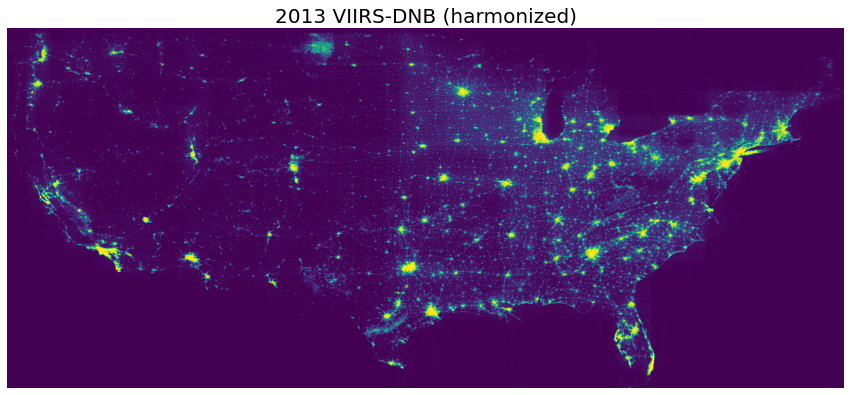

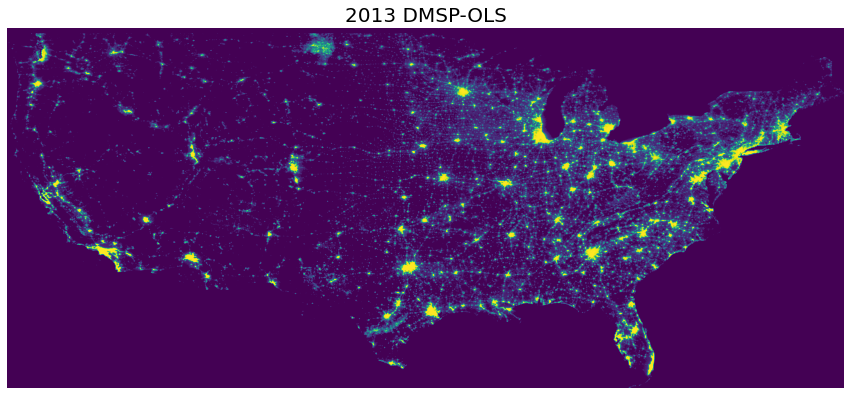

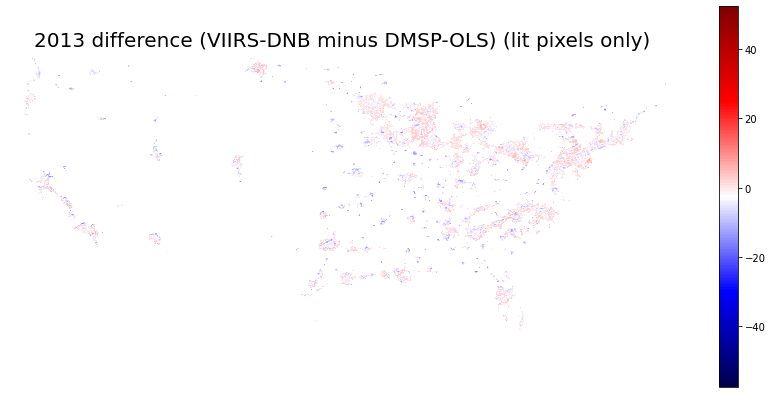

In [2]:
difference_plots(Path(Path.cwd().parent, "results", "conus", "2013_comparison_raster.tif"))

At a glance the differences are tough to discern (top and middle), athough the higher sensitivity VIIRS-DNB shows more structure and detail in the rural and outer suburb areas. 

The difference map further highlights this: areas outside the urban areas show higher VIIRS-DNB relative to DMSP-OLS (red) but the urban cores show that the DMSP-OLS is more intense (blue), likely due to the high saturation of DMSP-OLS in light-intense areas that the model didnt fully correct for.

### Histogram of 2013 DMSP-OLS and VIIRS-DNB

![conus hist](../results/conus/2013hist.png)

The histogram shows a near alignment in distribution of VIIRS after harmonization (blue) and DMSP (red). The Anderson-Darling non-paramentric test of variance in distribution failed to reject the null (that these are drawn from the same population) -- i.e. no evidence that these samples vary significantly.

#### Scattepot of 2013 VIIRS-DNB (after harmonization) and DMSP-OLS

![conus scatter](../results/conus/2013scatter.png)

Scatter shows a strong linear alignment of VIIRS-DNB (after harmonization) and DMSP-OLS.

## Time series of annual composites (1992-2020) after harmonization
In all plots, pixels with a "digital number" of less than 3 have been masked.

### Mean radiance per pixel (DMSP-OLS-like "digital number")

![conus ts mean](../results/conus/harmonized_ts_mean.png)

### Median radiance per pixel (DMSP-OLS-like "digital number")

![conus ts md](../results/conus/harmonized_ts_median.png)

### Sum of Lights (DMSP-OLS-like "digital number")

![conus ts mean](../results/conus/harmonized_ts_sum.png)

There are some aberrations (particularly in the DMSP-OLS series) but there appears to be a coherent time series. The median pixel radiance reduction shows a discontinuity from DMSP to VIIRS (perhaps even after harmonization the vast number of low light pixels in the US that VIIRS picked up better than DMSP raised the median value where as the harmonizer did a good job correcting for extremes, which is why the mean and SOL reductions were more consistent.).